# Import software libraries and load the dataset #

In [18]:
import sys                                             # Read system parameters.
import numpy as np                                     # Work with multi-dimensional arrays and matrices.
import pandas as pd                                    # Manipulate and analyze data.
import matplotlib as mpl                               # Create 2D charts.
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns                                  # Perform data visualization.
import sklearn                                         # Perform data mining and analysis.
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline


# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(mpl.__version__))
print('- Seaborn {}'.format(sb.__version__))
print('- scikit-learn {}\n'.format(sklearn.__version__))

# Load the dataset.
diabetes = datasets.load_diabetes()
print('Loaded {} records.'.format(len(diabetes.data)))

Libraries used in this project:
- Python 3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) 
[GCC 7.3.0]
- NumPy 1.16.2
- pandas 0.24.2
- Matplotlib 3.0.3
- Seaborn 0.9.0
- scikit-learn 0.20.3

Loaded 442 records.


# Get acquainted with the dataset

In [19]:
# Convert array to pandas DataFrame.

# View data types and see if there are missing entries.

# View first 10 records.
print(diabetes)
type(diabetes)
df = pd.DataFrame(pd.DataFrame(diabetes.data, columns=diabetes.feature_names))
df["target"] = pd.Series(diabetes.target)
df.info()
df.head(10)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0


# Examine the distribution of various features

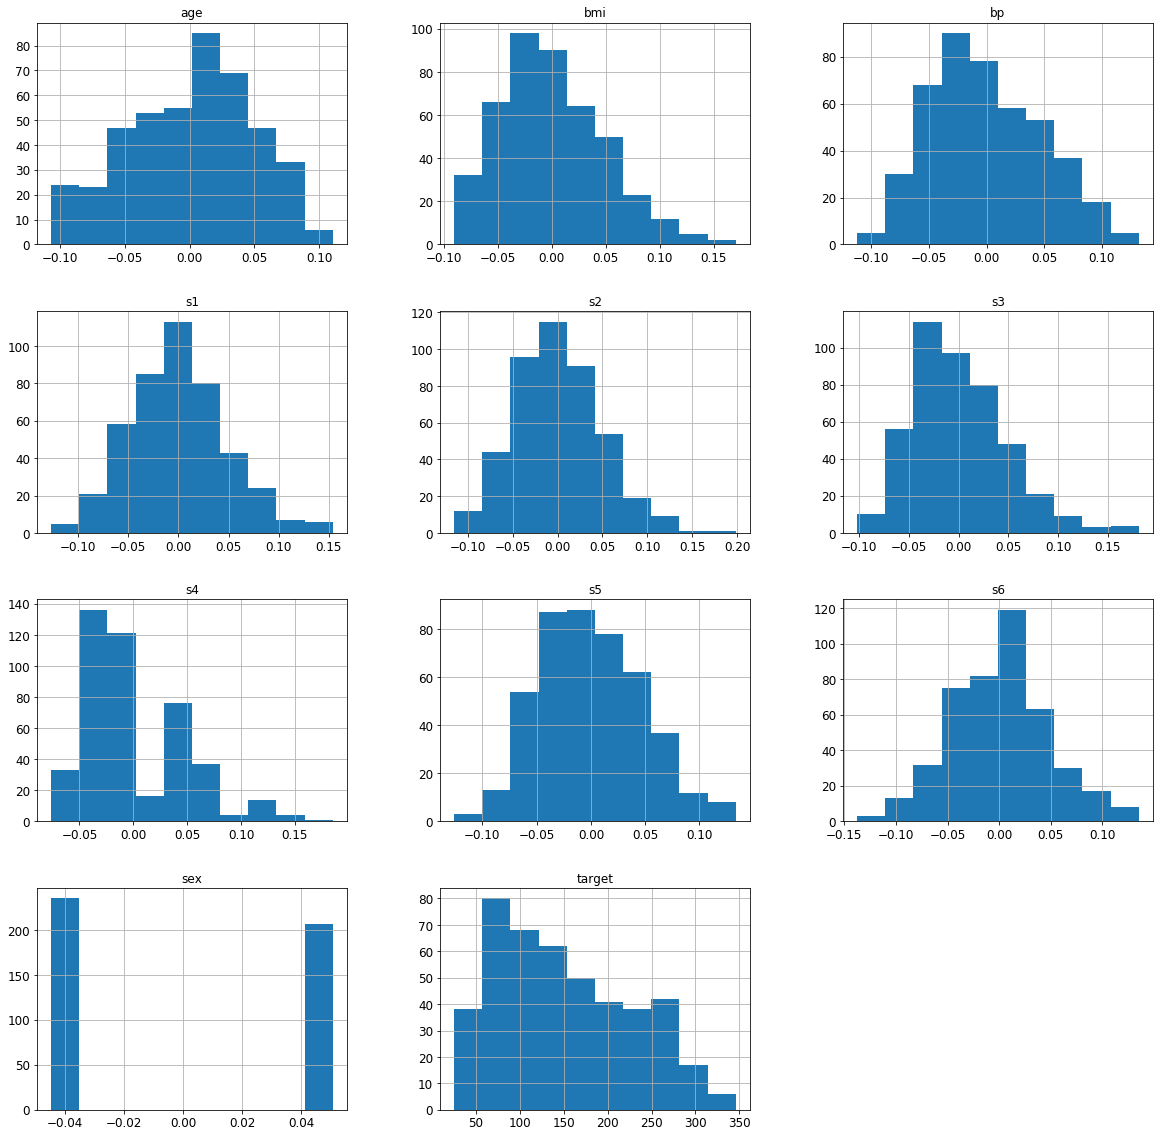

In [6]:
# Use Matplotlib to plot distribution histograms for all features.
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

df.hist(figsize=(20,20))
plt.show()

# Examine a general summary of statistics

In [7]:
# View summary statistics (mean, standard deviation, min, max, etc.) for each feature.
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


# Look for columns that correlate with `target` (disease progression)#

In [12]:
# View the correlation values for each feature compared to the label.
df.corr()
df.corr()["target"].sort_values()

s3       -0.394789
sex       0.043062
s2        0.174054
age       0.187889
s1        0.212022
s6        0.382483
s4        0.430453
bp        0.441484
s5        0.565883
bmi       0.586450
target    1.000000
Name: target, dtype: float64

# Split the label from the dataset

In [21]:
# Split the training and test datasets and their labels.

# Compare the number of rows and columns in the original data to the training and test sets.
df.shape
X = df.iloc[:,0:10]
y = df.iloc[:,10]
X.values, y.values

(array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
   

# Drop columns that won't be used for training

In [22]:
# Drop the three features that have the least correlation with the label.
X = X.drop(['s3','sex','s2'],axis=1)
X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 7), (89, 7), (353,), (89,))

# Create a linear regression model

In [26]:
# Construct a basic linear regression class object.

# Fit the training data to the regression object.

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Compare the first ten predictions to actual values

In [27]:
# Make predictions on the test set.

# View examples of the predictions compared to actual disease progression.
lr_pred = lr.predict(X_test)
lr_pred[:10]
y_test[:10]
X_test
table = X_test.copy()
table.shape
table["True Value"] = y_test.copy()
table
table["Predicted"] = np.round(lr_pred,2)
table

,age,bmi,bp,s1,s4,s5,s6,True Value,Predicted
362,0.019913,0.104809,0.070073,-0.035968,-0.002592,0.003712,0.040343,321.0,246.52
249,-0.012780,0.060618,0.052858,0.047965,0.034309,0.070211,0.007207,215.0,237.50
271,0.038076,0.008883,0.042530,-0.042848,-0.002592,-0.018118,0.007207,127.0,168.15
435,-0.012780,-0.023451,-0.040099,-0.016704,-0.002592,-0.038459,-0.038357,64.0,108.45
400,-0.023677,0.045529,0.090730,-0.018080,-0.039493,-0.034524,-0.009362,175.0,181.21
403,-0.020045,0.097264,-0.005671,-0.005697,-0.002592,0.061686,0.040343,275.0,251.03
12,0.016281,-0.028840,-0.009113,-0.004321,-0.039493,-0.030751,-0.042499,179.0,105.76
399,0.059871,0.022895,0.049415,0.016318,-0.002592,0.039540,0.019633,232.0,194.56
198,-0.052738,0.054152,-0.026328,-0.055231,-0.039493,-0.074089,-0.059067,142.0,144.43
205,-0.030942,0.046607,0.014987,-0.016704,-0.002592,0.063456,-0.025930,99.0,229.14


# Calculate the error between predicted and actual values

In [28]:
# Print the mean squared error (MSE) for the model's predictions on the test set.
mean_squared_error(y_test,lr_pred)

3531.2250809792135

# Plot lines of best fit for four features

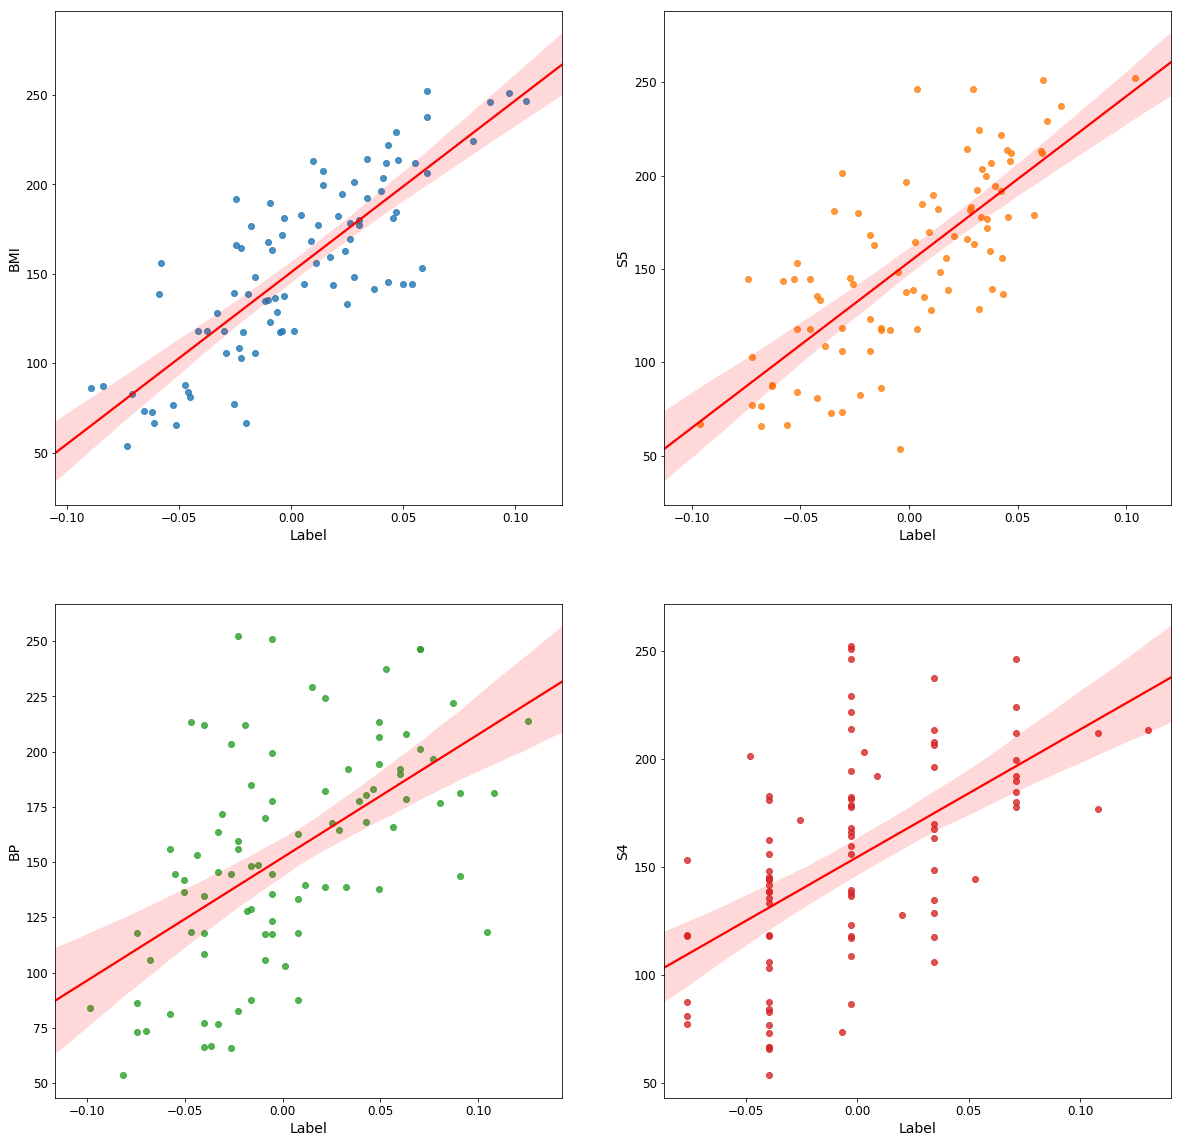

In [29]:
# Use Seaborn to create subplots for the four features that have the strongest correlation with the label.
# Also plot a line of best fit for each feature.

line_color = {'color': 'red'}
fig , ax = plt.subplots(2,2, figsize=(20,20))

#BMI

ax1 = sns.regplot(x=X_test.bmi, y=lr_pred, line_kws=line_color, ax=ax[0,0])
ax1.set_xlabel("Label")
ax1.set_ylabel("BMI")


#s5

ax2 = sns.regplot(x=X_test.s5, y=lr_pred, line_kws=line_color, ax=ax[0,1])
ax2.set_xlabel("Label")
ax2.set_ylabel("S5")


#bp

ax3 = sns.regplot(x=X_test.bp, y=lr_pred, line_kws=line_color, ax=ax[1,0])
ax3.set_xlabel("Label")
ax3.set_ylabel("BP")

#s4

ax4 = sns.regplot(x=X_test.s4, y=lr_pred, line_kws=line_color, ax=ax[1,1])
ax4.set_xlabel("Label")
ax4.set_ylabel("S4")

plt.show()